# CAPSTONE PROJECT HR ANALYTICS 

# Import Libraries

Let's import the required libraries to start with!

In [93]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import spearmanr

# Import Data file

Let's start reading the data file in pandas library


In [94]:
# Reading the data file with the read_csv
df=pd.read_csv('New_data_Set.csv')

# Understand the data, make a valid business sense and write about it:
# Feature Description with the column inferences:: 
 Gender - talks of the gender - Male or female
 Business - if the person has a business or no 
 Age - age of the person
 Salary - CTC of the employee
 Dependants - number of people dependant on the person
 Months - Duration of the person employed with the company
Calls - if the person has authority to make calls or not
 Type - salary settlement type
 Billing - Subscribed to billing plans or no
 Unit sales - unit sale made by the person
 Total sales - total sales made by the person
Rating - If he has been given a rating by a superior or no
 Bonus - amount received by a person as bonus for sales
 Base pay - Base pay of the employee
 Unit price - The Unit price of a sale
Volume - volume allotted to a person
 Opening balance - The opening balance of an employee
 Low - lowest balance allotted to a person.
Closing Balance- The closing balance of an employee
 Education- Educational background of an employee

##### The given data set contains the employee information and the facilites allocated to them as part of allowance and along with the information about the salary structure and the sales information by the employees based on all the above given parameter we can perform the Exploratory Data analysis and draw an insights from them and finally we train the ML model.



# Data analysis and interpretations: 
### Performing the based EDA steps to understand the data.

Let us begin with the exploratory data analysis!

In [95]:
df.head()# used to retrive the top 5 records

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [96]:
df.tail()# used to retrive the bottom 5 records

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


In [97]:
df.shape# Displays the shape of the data set

(5000, 20)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Gender            5000 non-null object
Business          5000 non-null int64
Dependancies      5000 non-null object
Calls             5000 non-null object
Type              5000 non-null object
Billing           5000 non-null object
Rating            5000 non-null object
Age               5000 non-null int64
Salary            5000 non-null float64
Base_pay          4977 non-null float64
Bonus             5000 non-null float64
Unit_Price        5000 non-null float64
Volume            5000 non-null int64
openingbalance    3524 non-null float64
closingbalance    5000 non-null float64
low               5000 non-null float64
Unit_Sales        5000 non-null float64
Total_Sales       4992 non-null object
Months            5000 non-null int64
Education         5000 non-null object
dtypes: float64(8), int64(4), object(8)
memory usage: 781.3+ KB


In [99]:
# Describe function tells about all the statistical values of all values descrete features
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


In [100]:
# nunique function describes about all the unique values in each of the column
df.nunique()

Gender               2
Business             2
Dependancies         2
Calls                2
Type                 3
Billing              2
Rating               2
Age                 65
Salary            5000
Base_pay          4883
Bonus             5000
Unit_Price        3836
Volume            4831
openingbalance    2986
closingbalance    4011
low               4014
Unit_Sales        1434
Total_Sales       4706
Months              73
Education            4
dtype: int64

## Handling Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data.

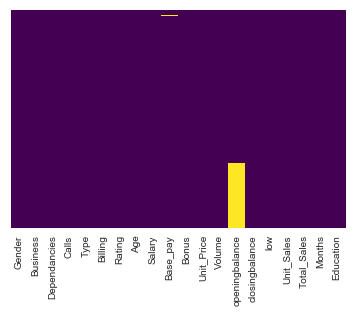

In [101]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [102]:
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

### We have Null values in Base_pay,openingbalance  and Total sales feature, we can 30 % of null data in opening balance and very minimal missing values in Base_pay and Total sales, we can replace the base_pay and total sales null values and  drop the  Opening balance.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Gender            5000 non-null object
Business          5000 non-null int64
Dependancies      5000 non-null object
Calls             5000 non-null object
Type              5000 non-null object
Billing           5000 non-null object
Rating            5000 non-null object
Age               5000 non-null int64
Salary            5000 non-null float64
Base_pay          4977 non-null float64
Bonus             5000 non-null float64
Unit_Price        5000 non-null float64
Volume            5000 non-null int64
openingbalance    3524 non-null float64
closingbalance    5000 non-null float64
low               5000 non-null float64
Unit_Sales        5000 non-null float64
Total_Sales       4992 non-null object
Months            5000 non-null int64
Education         5000 non-null object
dtypes: float64(8), int64(4), object(8)
memory usage: 781.3+ KB


#### Converting the data type of Total_sales from object to a float values- as the values of the total sales will possibly be Numeric all the times.


In [104]:
# Replacing the Blankspaces in the Total Sales column to zero
df['Total_Sales']= df['Total_Sales'].str.replace(' ', '0')

In [105]:
# this piece of code converts the total-sales column from Object to float format.
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], downcast="float")

In [106]:
df['Total_Sales'].fillna((df['Total_Sales'].min()),inplace=True)

In [107]:
#Filling the NA values of Base_pay column to a Mean values
df['Base_pay'].fillna((df['Base_pay'].mean()),inplace=True)


In [108]:
#Droping the OpeningBalance columns as it contains almost 30% of the null values
df.drop(['openingbalance'], axis=1, inplace=True)

In [109]:
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.577828,43.034129,64.84151,2265.104004,32.18480
std,0.366643,8.560691,25376.961744,10112.342452,1268.848087,52.244022,1.620476e+07,37.148512,36.760641,30.13968,2267.721436,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.650000,18.25000,0.000000,0.00000
25%,0.000000,47.000000,83890.338980,33744.021630,4194.516950,25.727500,1.283850e+06,21.990000,21.718750,35.50000,378.262497,8.00000
50%,0.000000,52.000000,100579.378500,40231.751415,5028.968925,39.205000,2.870600e+06,33.340000,32.880001,70.50000,1389.049988,28.00000
75%,0.000000,57.000000,116912.092475,46764.836975,5845.604624,58.715000,6.247100e+06,51.117500,50.415000,89.95000,3722.337402,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.688694,312.432438,118.75000,8684.799805,72.00000


In [110]:
# Checking the Duplicate values of there are any duplicate values which represented as True, here  all the 5000 records are false
#which states that all are unique records
df.duplicated().value_counts()

False    5000
dtype: int64

In [111]:
 df.head(2)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.450,3.77,21226600,3.76,3.65,18.25,18.799999,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.906,3.74,10462800,3.68,3.65,18.40,18.850000,0,High School or less


# Handling the categorical data

We cannot perform the operations on categorical data, so we should convert them nominal data, We have the categorical data in Gender Dependancies, Calls, Type, Billing, Rating,Education converting them into the numerical categories by using dummies method.


In [112]:
Gender=pd.get_dummies(df['Gender'], drop_first=True)

In [113]:
Dependancies=pd.get_dummies(df['Dependancies'], drop_first=True)
Calls=pd.get_dummies(df['Calls'], drop_first=True)
Type=pd.get_dummies(df['Type'], drop_first=True)
Billing=pd.get_dummies(df['Billing'], drop_first=True)
Rating=pd.get_dummies(df['Rating'], drop_first=True)
Education=pd.get_dummies(df['Education'], drop_first=True)


### Post creating the dummies of required colums we are droping the orignal columns as we are using the created columns of dummies 

In [114]:
df.drop(['Gender','Dependancies','Calls','Type','Billing','Rating','Education'], axis=1, inplace=True)

### Adding the dummies data to our original data set with the below given function concat

In [115]:
df=pd.concat([df,Gender,Dependancies,Calls,Type,Billing,Rating,Education], axis=1)

In [116]:
df

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,...,Male,Yes,Yes,One year,Two year,Yes,Yes,High School or less,Intermediate,PG
0,0,18,5089.000000,2035.600000,254.450000,3.770000,21226600,3.760000,3.650000,18.25,...,0,0,1,0,0,0,1,1,0,0
1,0,19,5698.120000,2279.248000,284.906000,3.740000,10462800,3.680000,3.650000,18.40,...,0,0,1,0,0,0,1,1,0,0
2,0,22,5896.650000,2358.660000,294.832500,3.890000,18761000,4.290000,3.720000,18.70,...,1,0,1,0,0,1,0,1,0,0
3,1,21,6125.120000,2450.048000,306.256000,4.350000,66130600,4.310000,3.830000,18.75,...,0,0,1,0,0,1,1,1,0,0
4,0,23,6245.000000,2498.000000,312.250000,4.340000,26868200,4.410000,4.080000,18.80,...,1,0,1,0,0,1,1,1,0,0
5,0,23,6444.230000,2577.692000,322.211500,4.370000,29869600,5.040000,4.130000,18.80,...,1,0,1,0,1,1,0,1,0,0
6,0,23,6455.500000,2582.200000,322.775000,4.420000,25239200,5.590000,4.150000,18.80,...,1,1,0,0,1,1,0,1,0,0
7,0,24,6458.357220,2583.342888,322.917861,4.440000,28307500,5.670000,4.210000,18.80,...,0,0,1,1,0,1,0,0,1,0
8,1,24,6529.230000,2611.692000,326.461500,4.450000,24295600,6.170000,4.270000,18.85,...,0,0,1,0,0,1,1,0,1,0
9,0,43,6682.330000,2672.932000,334.116500,4.410000,17671600,6.095000,4.220000,18.85,...,1,0,1,0,0,1,0,0,1,0


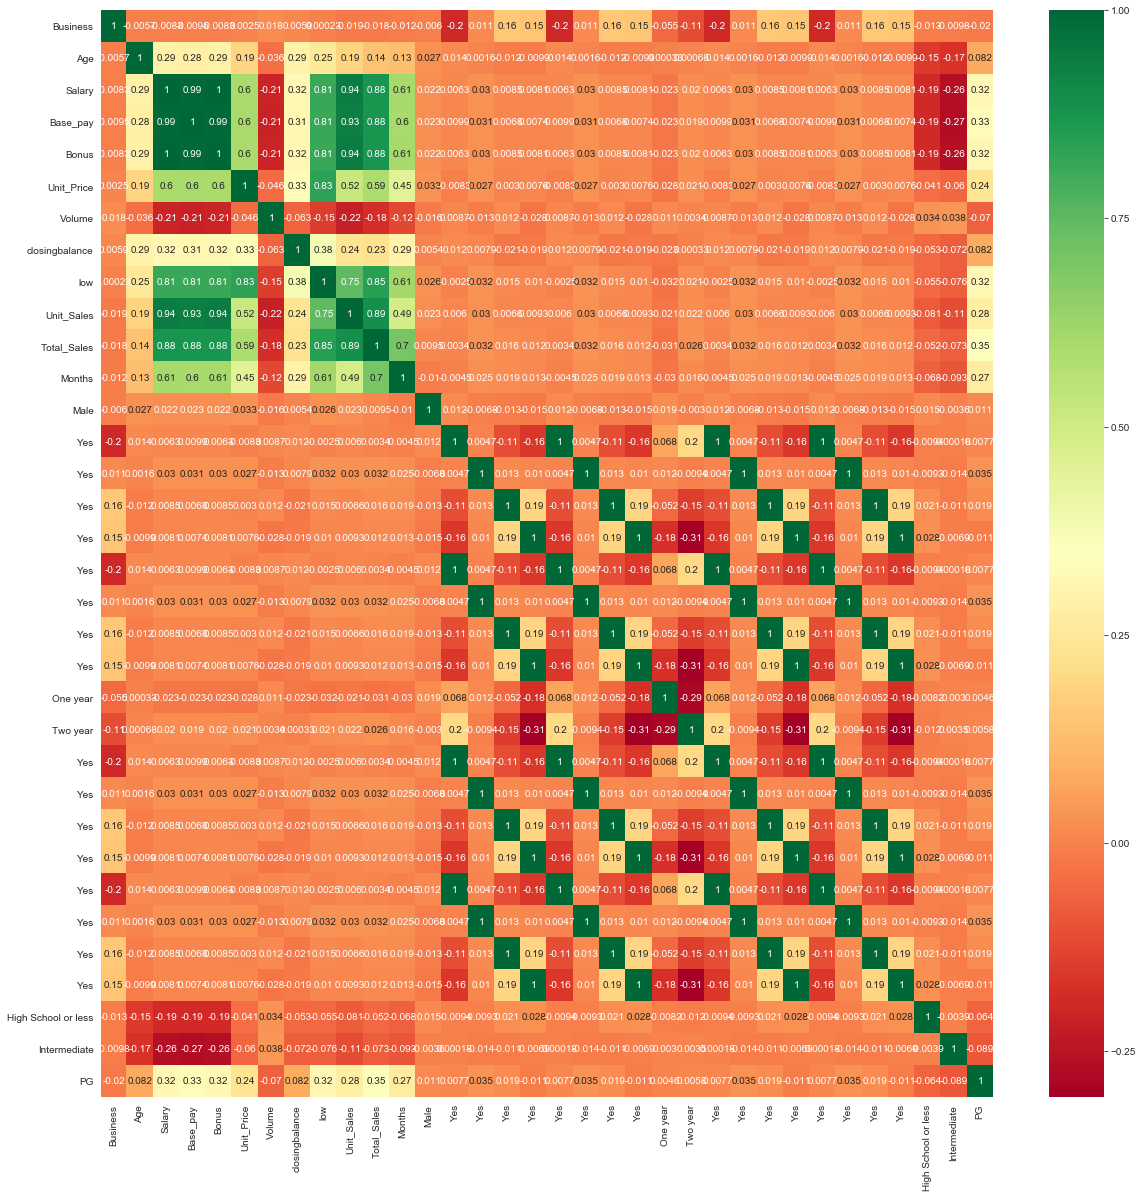

In [117]:
#Feature selection:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Based on our analyse we have obsereved the Features like Age, Salary, Base_pay ,Bonus,Unit_Price,closingbalance, low,Unit_Sales,Total_Sales, Months,PG are highly corelated


# The Spearman rank-order correlation

#### The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.



In [118]:
# Age=df['Age']
Salary=df['Salary'] 
Base_pay=df['Base_pay']
Total_Sales=df['Total_Sales']
Unit_Sales=df['Unit_Sales']
Months=df['Months']
PG=df['PG']

spearmanr_coefficient, P_value= spearmanr(Salary,Age)
print( 'Spearman Rank Correlation Coefficient Salary& age: %0.3f ' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient Salary& age: 0.202 


In [66]:
spearmanr_coefficient, P_value= spearmanr(Salary,Base_pay)
print( 'Spearman Rank Correlation Coefficient Salary& Base_pay: %0.3f ' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient Salary& Base_pay: 0.994 


In [67]:
spearmanr_coefficient, P_value= spearmanr(Salary,Total_Sales)
print( 'Spearman Rank Correlation Coefficient Salary& Total_Sales: %0.3f ' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient Salary& Total_Sales: 0.988 


In [70]:
spearmanr_coefficient, P_value= spearmanr(Salary,Unit_Sales)
print( 'Spearman Rank Correlation Coefficient Salary& Unit_Sales: %0.3f ' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient Salary& Unit_Sales: 1.000 


In [71]:
spearmanr_coefficient, P_value= spearmanr(Salary,Months)
print( 'Spearman Rank Correlation Coefficient Salary& Months: %0.3f ' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient Salary& Months: 0.604 


In [72]:
spearmanr_coefficient, P_value= spearmanr(Salary,PG)
print( 'Spearman Rank Correlation Coefficient Salary& PG: %0.3f ' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient Salary& PG: 0.304 


In [29]:
# Considering the features based on the Correlation factor
df=df[['Age','Salary','Base_pay','Bonus','Unit_Price','closingbalance','low','Unit_Sales','Total_Sales','Months','PG']]

In [30]:
df.head()

,Age,Salary,Base_pay,Bonus,Unit_Price,closingbalance,low,Unit_Sales,Total_Sales,Months,PG
0,18,5089.00,2035.600,254.4500,3.77,3.76,3.65,18.25,18.799999,0,0
1,19,5698.12,2279.248,284.9060,3.74,3.68,3.65,18.40,18.850000,0,0
2,22,5896.65,2358.660,294.8325,3.89,4.29,3.72,18.70,18.900000,0,0
3,21,6125.12,2450.048,306.2560,4.35,4.31,3.83,18.75,19.000000,0,0
4,23,6245.00,2498.000,312.2500,4.34,4.41,4.08,18.80,19.049999,1,0


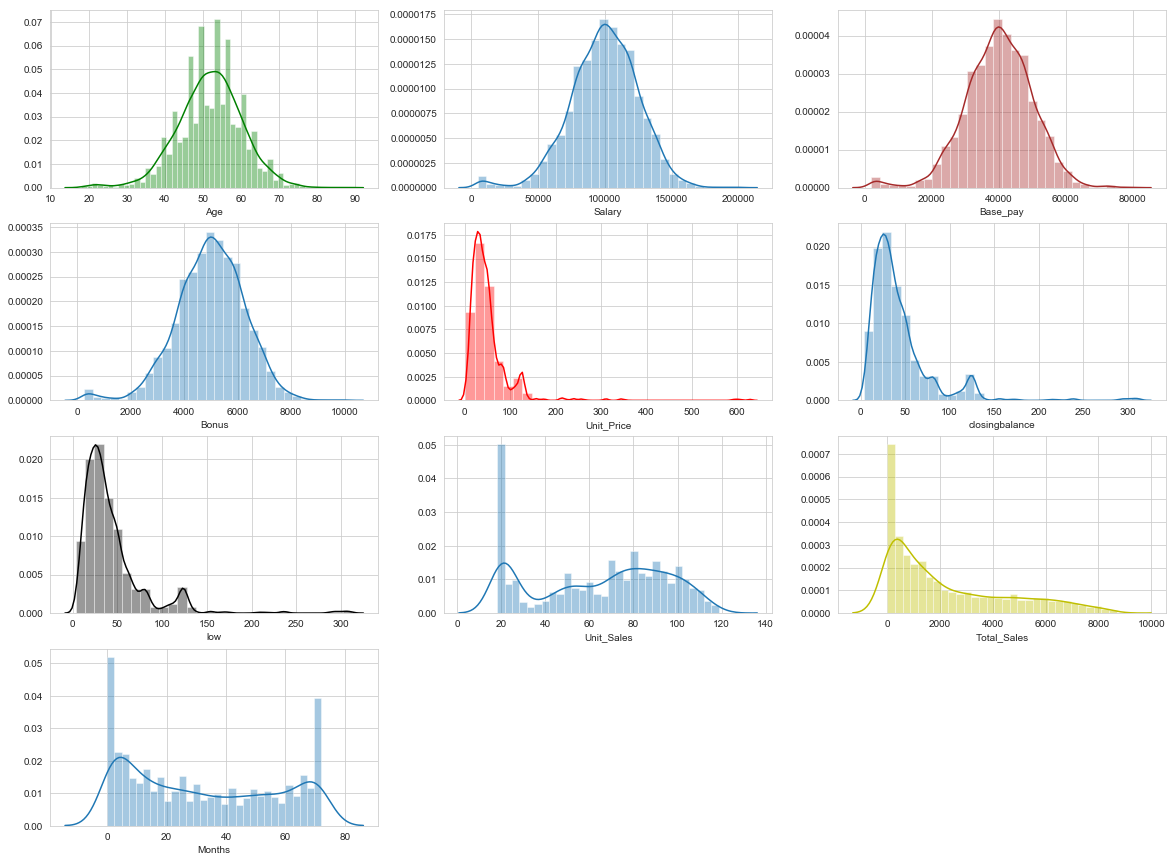

In [31]:
# Distibution of all the features

sns.set_style("whitegrid")
plt.figure(figsize=(20,15))

plt.subplot(4,3,1)# subplot is used to plot the multiple plot in a single frame here 4 is the number of rows 3 is columns.
sns.distplot(df['Age'],color='g') 
plt.subplot(4,3,2)
sns.distplot(df['Salary'], bins=30) 
plt.subplot(4,3,3)
sns.distplot(df['Base_pay'], bins=30,color='brown')
plt.subplot(4,3,4)
sns.distplot(df['Bonus'], bins=30)
plt.subplot(4,3,5)
sns.distplot(df['Unit_Price'], bins=30,color='R')
plt.subplot(4,3,6)
sns.distplot(df['closingbalance'], bins=30)
plt.subplot(4,3,7)
sns.distplot(df['low'], bins=30,color='black')
plt.subplot(4,3,8)
sns.distplot(df['Unit_Sales'], bins=30)
plt.subplot(4,3,9)
sns.distplot(df['Total_Sales'], bins=30,color='y')
plt.subplot(4,3,10)
sns.distplot(df['Months'], bins=30)


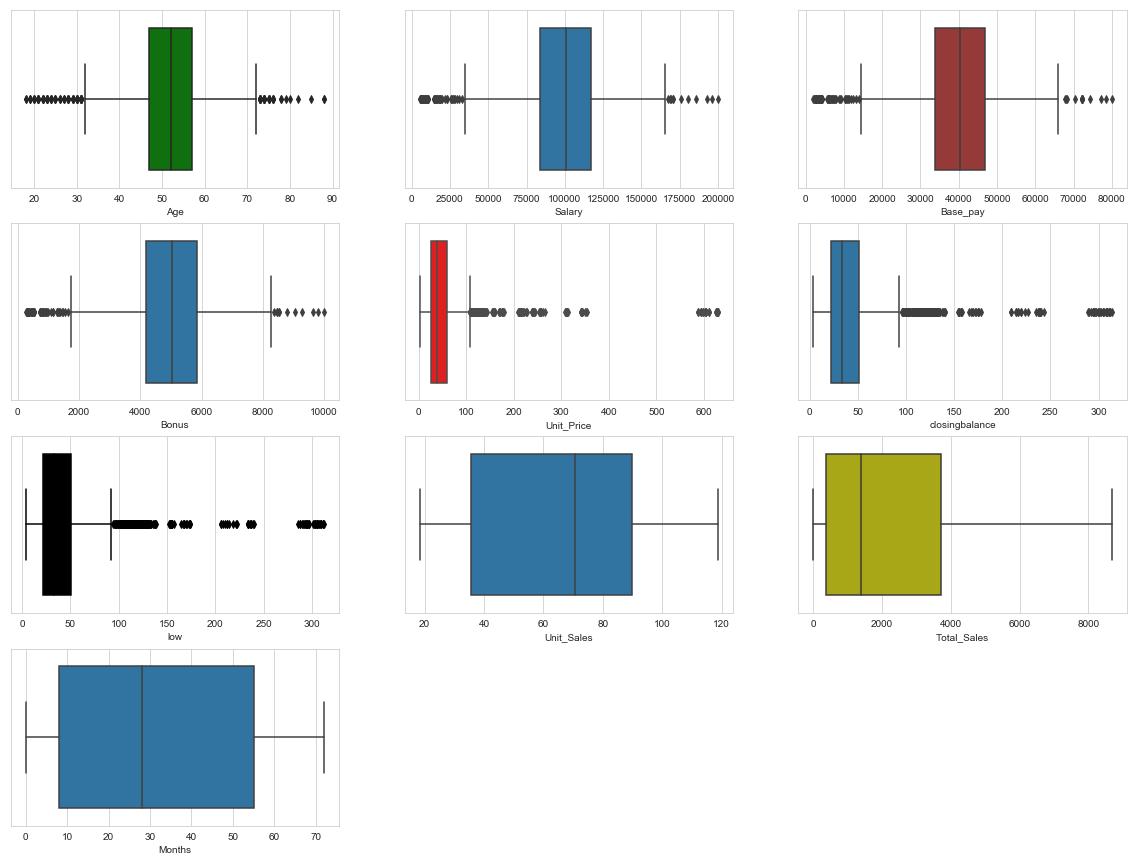

In [32]:
# checking  the outliers of all the features 
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))

plt.subplot(4,3,1)
sns.boxplot(df['Age'],color='g') 
plt.subplot(4,3,2)
sns.boxplot(df['Salary']) 
plt.subplot(4,3,3)
sns.boxplot(df['Base_pay'], color='brown')
plt.subplot(4,3,4)
sns.boxplot(df['Bonus'])
plt.subplot(4,3,5)
sns.boxplot(df['Unit_Price'],color='R')
plt.subplot(4,3,6)
sns.boxplot(df['closingbalance'])
plt.subplot(4,3,7)
sns.boxplot(df['low'], color='black')
plt.subplot(4,3,8)
sns.boxplot(df['Unit_Sales'])
plt.subplot(4,3,9)
sns.boxplot(df['Total_Sales'], color='y')
plt.subplot(4,3,10)
sns.boxplot(df['Months'])


# Handling the outliers:
### Handling the outliers for the normally distributed features

In [33]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

## Calculating the upper and lower boundaries for age
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

26.18292670406536
77.54707329593464
51.865


(None, None, None)

In [34]:
df.loc[df['Age']>=77,'Age']=77

C:\Users\shiva\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
df.loc[df['Age']<=26,'Age']=26

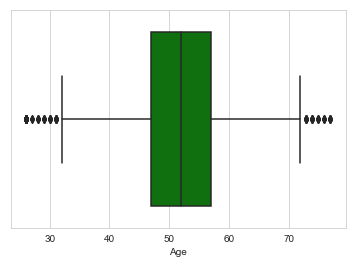

In [36]:

sns.boxplot(df['Age'],color='g') 

In [37]:
## Calculating the upper and lower boundaries for Base_pay
uppper_boundary=df['Base_pay'].mean() + 3* df['Base_pay'].std()
lower_boundary=df['Base_pay'].mean() - 3* df['Base_pay'].std()
print(lower_boundary), print(uppper_boundary),print(df['Base_pay'].mean())

9709.160351424718
70383.21506213897
40046.18770678184


(None, None, None)

In [38]:
df.loc[df['Base_pay']>=70383,'Base_pay']=70383
df.loc[df['Base_pay']<=9709,'Base_pay']=9709

In [39]:
## Calculating the upper and lower boundaries for Bonus
uppper_boundary=df['Bonus'].mean() + 3* df['Bonus'].std()
lower_boundary=df['Bonus'].mean() - 3* df['Bonus'].std()
print(lower_boundary), print(uppper_boundary),print(df['Bonus'].mean())

1184.552166359571
8797.64068914672
4991.096427753146


(None, None, None)

In [40]:
df.loc[df['Bonus']>=8797,'Bonus']=70383
df.loc[df['Bonus']<=9709,'Bonus']=9709

In [41]:
#### Lets compute the Interquantile range to calculate the boundaries for the Unit_ price,closing balance and low columns
IQR=df.Unit_Price.quantile(0.75)-df.Unit_Price.quantile(0.25)
print(IQR)
lower_bridge=df['Unit_Price'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Unit_Price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

32.9875005
-23.753751
108.196251


(None, None)

In [42]:
#### Extreme outliers
lower_bridge=df['Unit_Price'].quantile(0.25)-(IQR*3)
upper_bridge=df['Unit_Price'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-73.23500175000001
157.67750175


(None, None)

In [43]:
df.loc[df['Unit_Price']>=157,'Bonus']=157


In [44]:
IQR=df.Unit_Price.quantile(0.75)-df.Unit_Price.quantile(0.25)
print(IQR)
lower_bridge=df['closingbalance'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['closingbalance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)



32.9875005
-27.491250750000003
100.59875124999999


(None, None)

In [45]:
lower_bridge=df['closingbalance'].quantile(0.25)-(IQR*3)
upper_bridge=df['closingbalance'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-76.9725015
150.080002


(None, None)

In [46]:
df.loc[df['closingbalance']>=150,'Bonus']=150

In [47]:
IQR=df.Unit_Price.quantile(0.75)-df.Unit_Price.quantile(0.25)
print(IQR)
lower_bridge=df['low'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['low'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

32.9875005
-27.7625010625
99.89625075000001


(None, None)

In [48]:
lower_bridge=df['low'].quantile(0.25)-(IQR*3)
upper_bridge=df['low'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-77.2437518125
149.3775015


(None, None)

In [49]:
df.loc[df['low']>=149,'Bonus']=149

# MODEL BUILDING

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary', axis =1)
y = df.Salary.values

#Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

## Training the Model
#### Now its time to train our model on our training data!

In [51]:
from sklearn.linear_model import LinearRegression
#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()


#### Train/fit lm on the training data.

In [52]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Predicting Test Data
##### Now that we have fit our model, let's evaluate its performance by predicting off the test values!
##### Use lm.predict() to predict off the X_test set of the data. 

In [78]:
y_pred=lm.predict(X_train)

In [79]:
y_pred

array([125512.59237227, 135983.89636242,  75280.39340054, ...,
       108738.84184497, 118310.79779306,  77255.02711745])

In [80]:
y_train

array([124773.287  , 136336.4176 ,  76571.55835, ..., 107807.0862 ,
       117194.9321 ,  77688.01952])

Text(0, 0.5, 'Predicted Y')

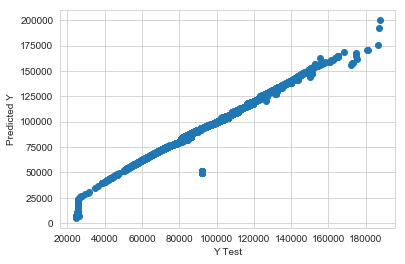

In [82]:
#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_pred,y_train)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [56]:
#Based on our model we have achieved 98% of accuracy model.
print(lm.score(X_train, y_train))


0.9803710921565996


### Based on our analysis we can conclude that Salary of the employee depends on the Total sales, unit sales and base pay, As Base pay is the primary estimator of salary of an employee, Incase if Base pay is missing or not as part of available data,the Unit Sales and the total sales are the important factors to estimate the salary of employee, correlation of unit sales is 1 and total sales is 0.98, which clearly  gives a clear view to estimate salary of an employee.